In [1]:
import pandas as pd
import numpy as np

import psycopg2
import sqlalchemy

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# DSN (data source name) format for database connections:  
# [protocol / database  name]://[username]:[password]@[hostname / ip]:[port]/[database name here]

# on your computer you are the user postgres (full administrative access)
db_user = 'postgres'
# if you need a password to access a database, put it here
db_password = ''
# on your computer, use localhost
db_host = 'localhost'
# the default port for postgres is 5432
db_port = 5432
# we want to creat a database with the following name
database = 'final_db'
#set up a connection to postgres without specifying the database
# conn_postgres = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}'

conn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'
conn = psycopg2.connect(conn_str)

# connect using sqlalchemy
engine = sqlalchemy.engine.create_engine(conn_str)

# connect using sqlalchemy
connection = engine.connect()

# # commit
# connection.execute('commit')

# close connection
connection.close()

# open a new connection to the database that we created
database = 'final_db'
conn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'
conn = psycopg2.connect(conn_str)

# connect using sqlalchemy
engine = sqlalchemy.engine.create_engine(conn_str)

In [2]:
query = """

SELECT c.nba_game_date, c.nba_season_id, e.br_location, c.nba_gm_type, e.br_outcome, c.nba_plus_minus home_plus_minus,  a.*, d.birthdate, d.nba_height, b.nba_e_off_rating, b.nba_off_rating, b.nba_e_def_rating, b.nba_def_rating,
b.nba_e_net_rating, b.nba_net_rating, b.nba_ast_pct, b.nba_ast_tov, b.nba_ast_ratio,
b.nba_oreb_pct, b.nba_dreb_pct, b.nba_reb_pct, b.nba_tm_tov_pct, b.nba_efg_pct,
b.nba_ts_pct, b.nba_usg_pct, b.nba_e_pace, b.nba_pace, b.nba_pace_per40, b.nba_poss, b.nba_pie, e.br_game_score
FROM nba_tra_box a
LEFT JOIN nba_adv_box b ON a.nba_player_id = b.nba_player_id AND a.nba_game_id = b.nba_game_id
LEFT JOIN (SELECT DISTINCT(nba_game_id), nba_game_date, nba_season_id, nba_plus_minus, nba_gm_type FROM nba_team_box WHERE nba_matchup LIKE '% vs.%') c
ON a.nba_game_id = c.nba_game_id
LEFT JOIN (SELECT nba_person_id, nba_height, to_char(CAST(nba_birthdate as date), 'YYYY-MM-DD') birthdate FROM nba_common_attr) d
ON a.nba_player_id = d.nba_person_id
LEFT JOIN (SELECT br_slug, br_team, br_opponent, br_date, br_game_score, br_outcome, br_location FROM brid_tra_box) e
ON (a.nba_player_id = e.br_slug AND to_char(CAST(c.nba_game_date as date), 'YYYY-MM-DD') = to_char(CAST(e.br_date as date), 'YYYY-MM-DD'))
ORDER BY c.nba_game_date

"""

data = pd.read_sql(query, con=conn)
display(data.head(10))
data.info()

,nba_game_date,nba_season_id,br_location,nba_gm_type,br_outcome,home_plus_minus,nba_game_id,nba_team_id,nba_team_abbreviation,nba_team_city,...,nba_tm_tov_pct,nba_efg_pct,nba_ts_pct,nba_usg_pct,nba_e_pace,nba_pace,nba_pace_per40,nba_poss,nba_pie,br_game_score
0,1999-11-02,21999,HOME,Regular,L,-7,29900011,1610612762,UTA,Utah,...,15.0,0.654,0.735,0.271,89.40,89.91,74.93,63.0,0.176,16.6
1,1999-11-02,21999,AWAY,Regular,W,-5,29900008,1610612749,MIL,Milwaukee,...,10.8,0.750,0.758,0.317,92.60,91.52,76.27,71.0,0.333,30.2
2,1999-11-02,21999,HOME,Regular,L,-7,29900011,1610612762,UTA,Utah,...,12.0,0.500,0.540,0.258,88.13,88.59,73.83,58.0,0.146,11.0
3,1999-11-02,21999,AWAY,Regular,W,-5,29900008,1610612749,MIL,Milwaukee,...,5.9,0.367,0.409,0.236,91.62,90.09,75.07,63.0,0.103,8.4
4,1999-11-02,21999,None,Regular,None,-20,29900013,1610612763,VAN,Vancouver,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.0,NaN,NaN
5,1999-11-02,21999,None,Regular,None,12,29900007,1610612744,GSW,Golden State,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.0,NaN,NaN
6,1999-11-02,21999,HOME,Regular,L,-7,29900002,1610612751,NJN,New Jersey,...,0.0,0.000,0.000,0.000,97.07,108.34,90.28,13.0,-0.136,0.4
7,1999-11-02,21999,AWAY,Regular,W,-20,29900013,1610612757,POR,Portland,...,0.0,1.000,1.031,0.667,98.02,101.05,84.21,6.0,0.640,7.7
8,1999-11-02,21999,HOME,Regular,W,8,29900001,1610612752,NYK,New York,...,0.0,0.200,0.255,0.085,97.06,95.02,79.18,63.0,0.032,2.4
9,1999-11-02,21999,HOME,Regular,L,-7,29900002,1610612751,NJN,New Jersey,...,0.0,0.667,0.667,0.053,99.99,106.84,89.03,50.0,0.075,4.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662482 entries, 0 to 662481
Data columns (total 58 columns):
nba_game_date            662482 non-null object
nba_season_id            662482 non-null object
br_location              553928 non-null object
nba_gm_type              662482 non-null object
br_outcome               553928 non-null object
home_plus_minus          662482 non-null int64
nba_game_id              662482 non-null object
nba_team_id              662482 non-null object
nba_team_abbreviation    662482 non-null object
nba_team_city            662482 non-null object
nba_player_id            662482 non-null object
nba_player_name          662482 non-null object
nba_start_position       269542 non-null object
nba_comment              107710 non-null object
nba_min                  662482 non-null int64
nba_fgm                  554771 non-null float64
nba_fga                  554771 non-null float64
nba_fg_pct               554771 non-null float64
nba_fg3m                

In [4]:
starters = data[data['nba_start_position'].isna()==False]

No handles with labels found to put in legend.


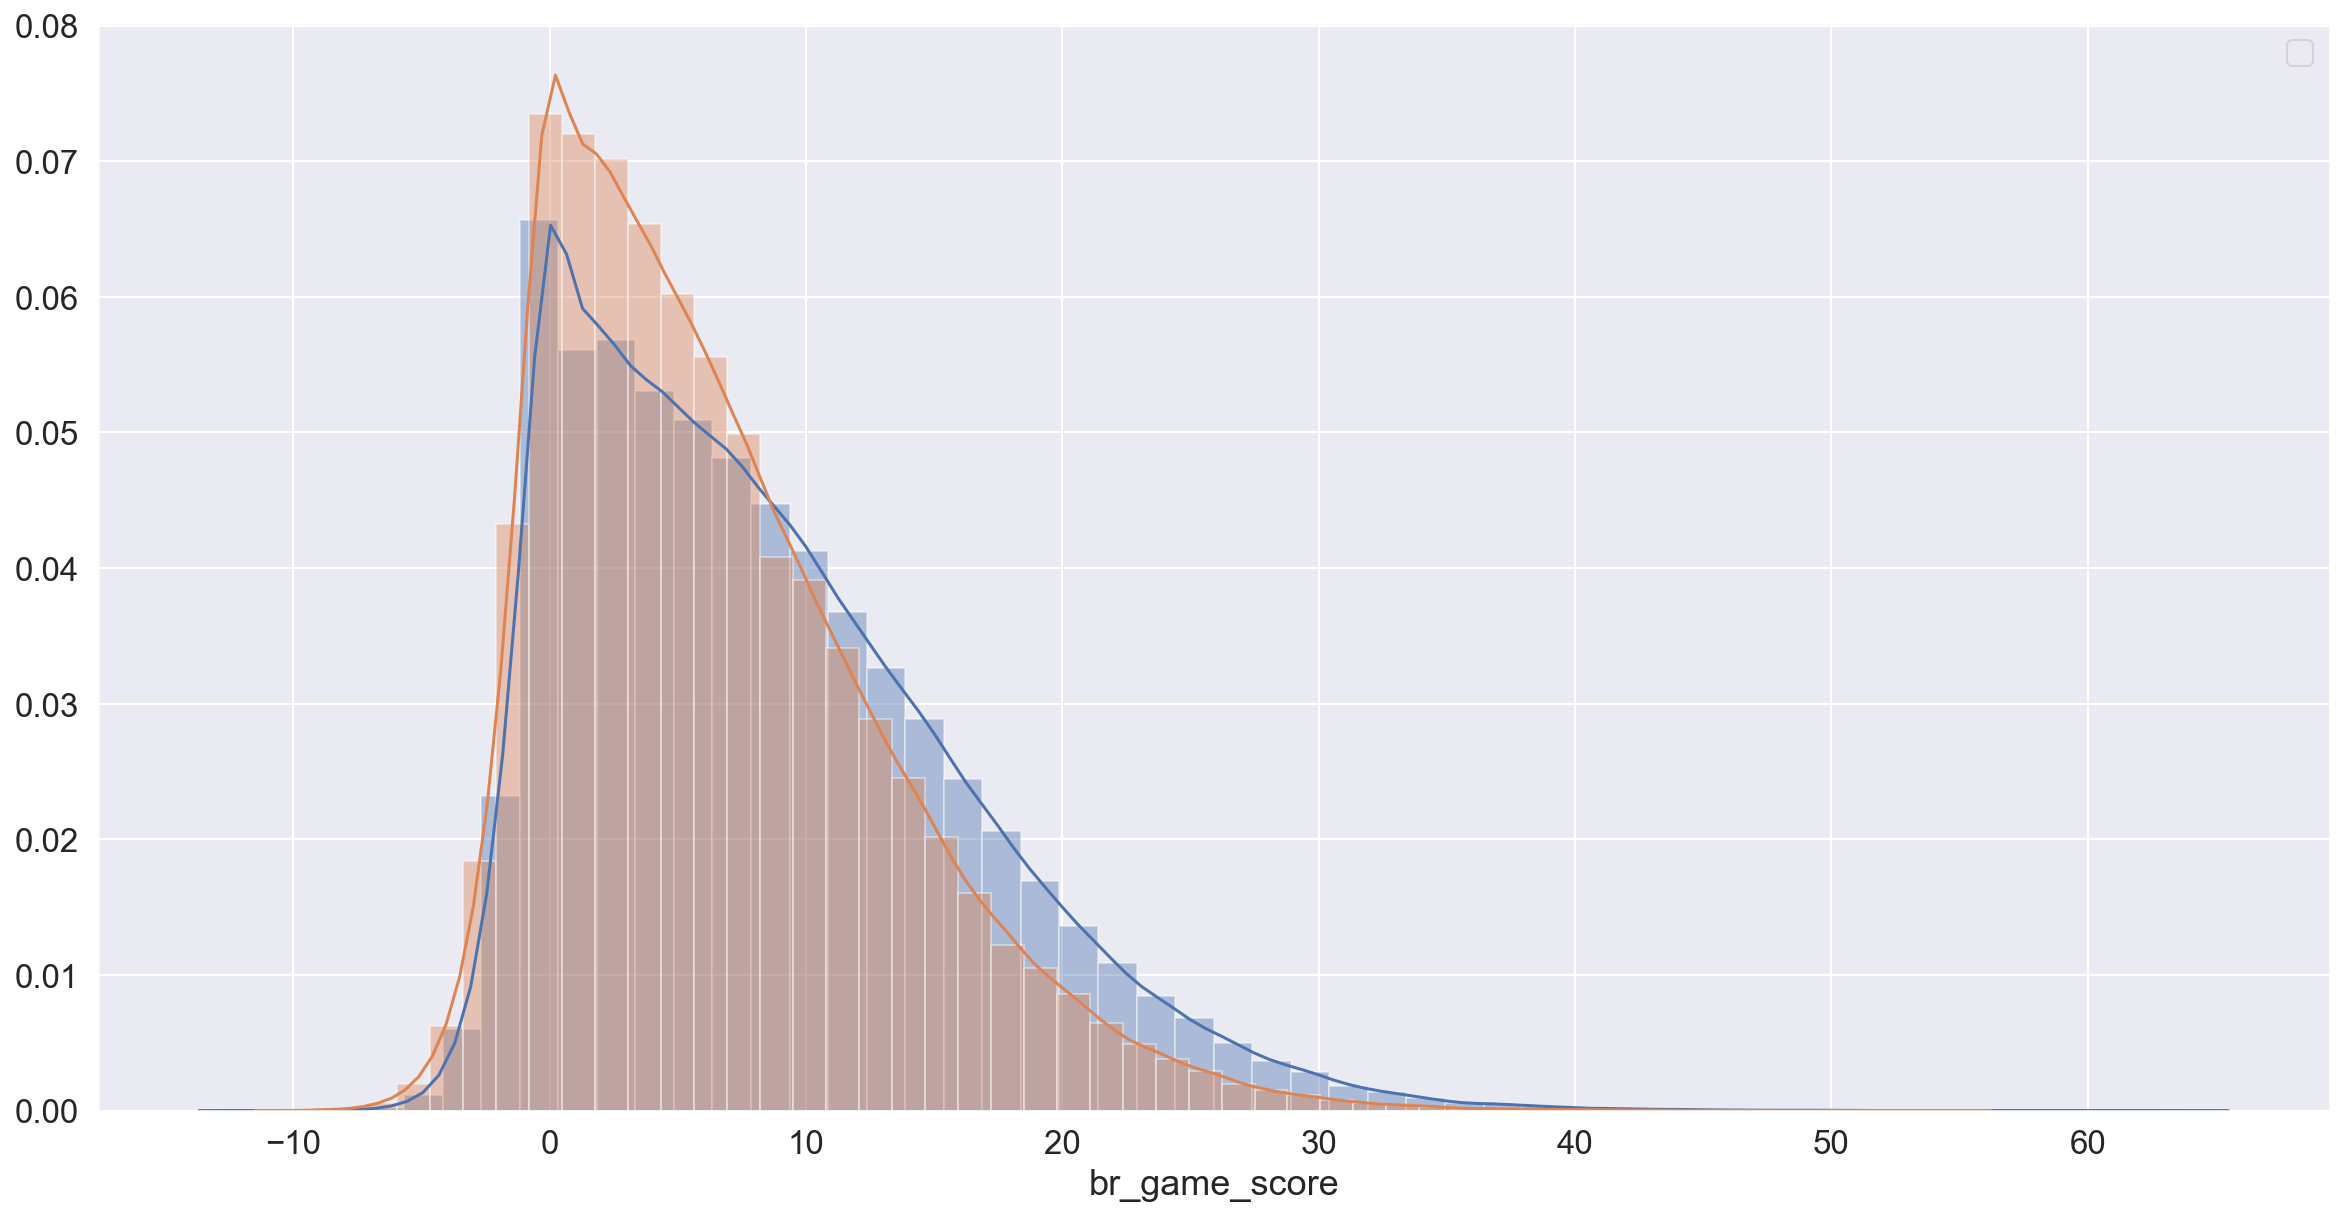

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(data[data['nba_']=='W']['br_game_score'])
sns.distplot(data[data['br_outcome']=='L']['br_game_score'])
plt.legend()
plt.show()

No handles with labels found to put in legend.


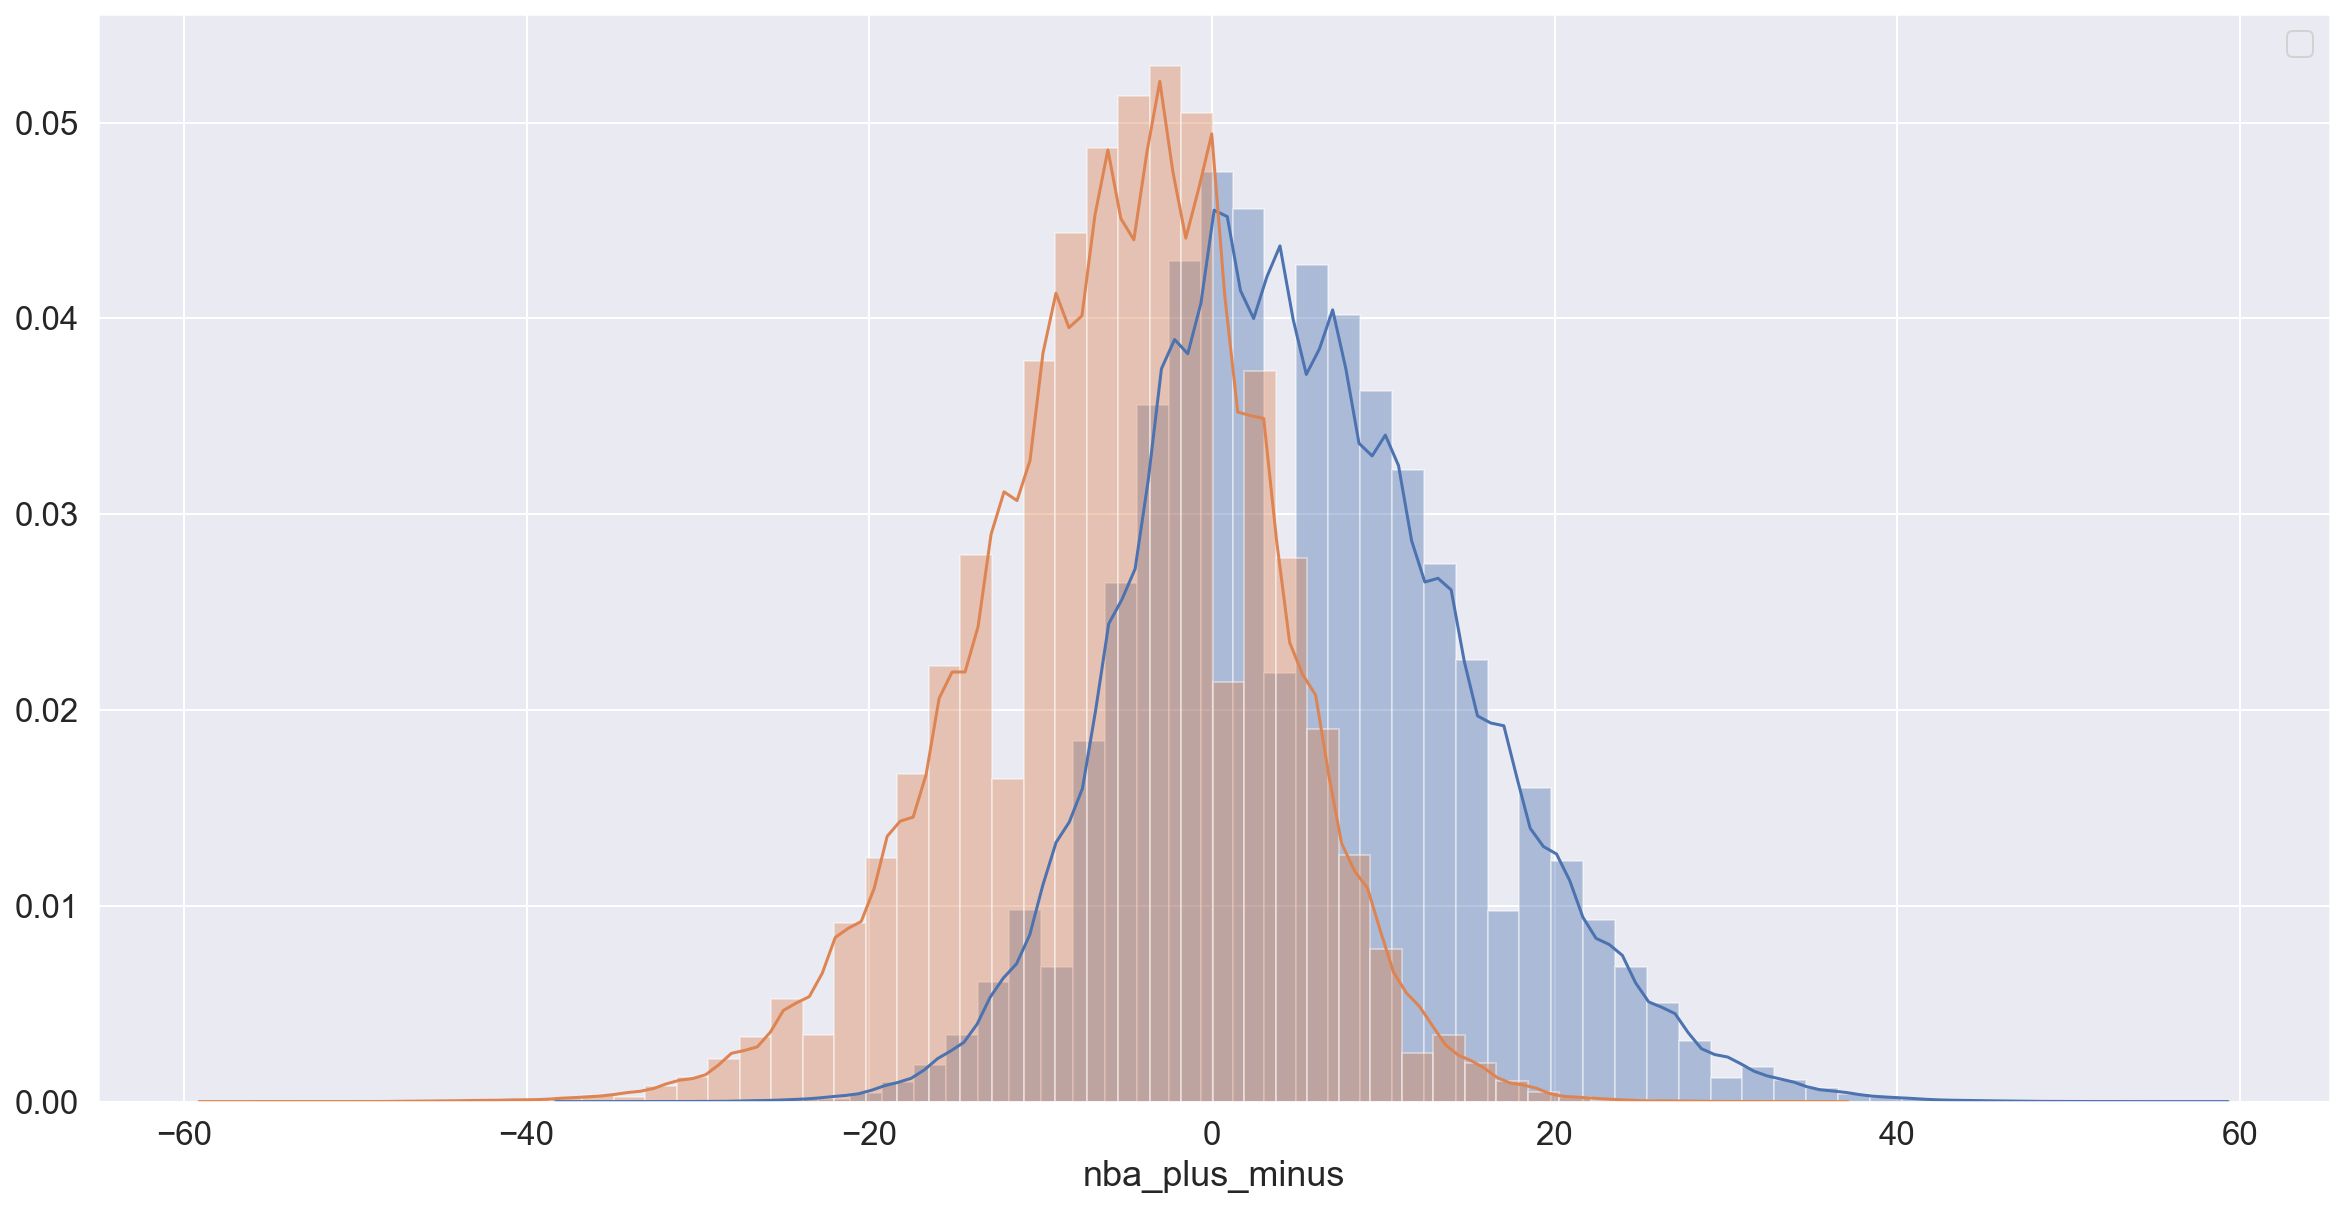

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(data[data['br_outcome']=='W']['nba_plus_minus'])
sns.distplot(data[data['br_outcome']=='L']['nba_plus_minus'])
plt.legend()
plt.show()

No handles with labels found to put in legend.


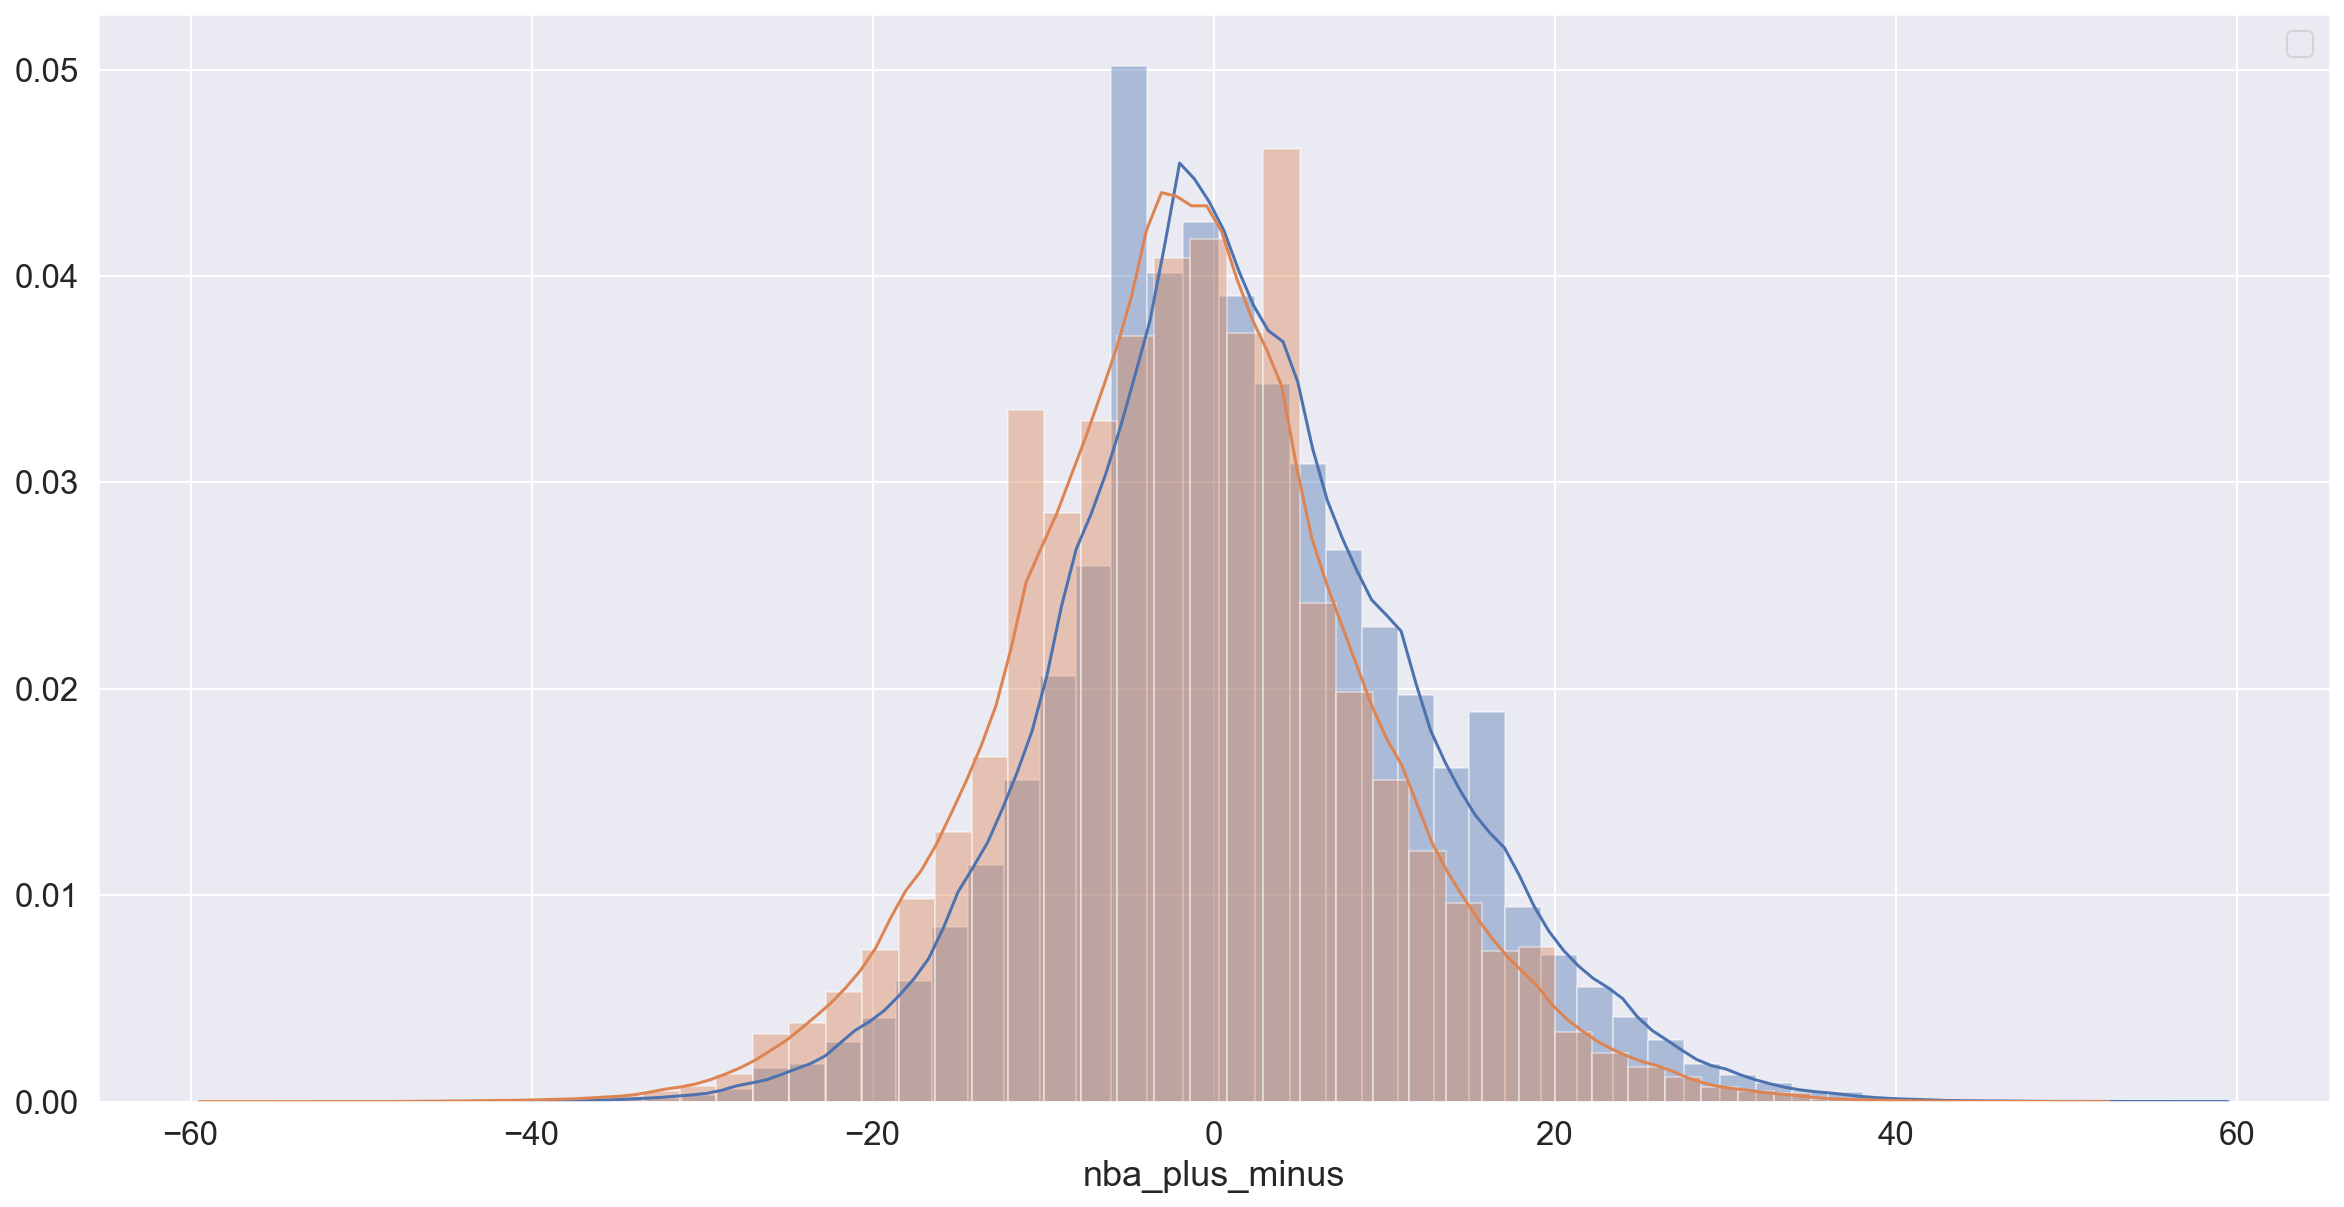

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(data[data['br_location']=='HOME']['nba_plus_minus'])
sns.distplot(data[data['br_location']=='AWAY']['nba_plus_minus'])
plt.legend()
plt.show()

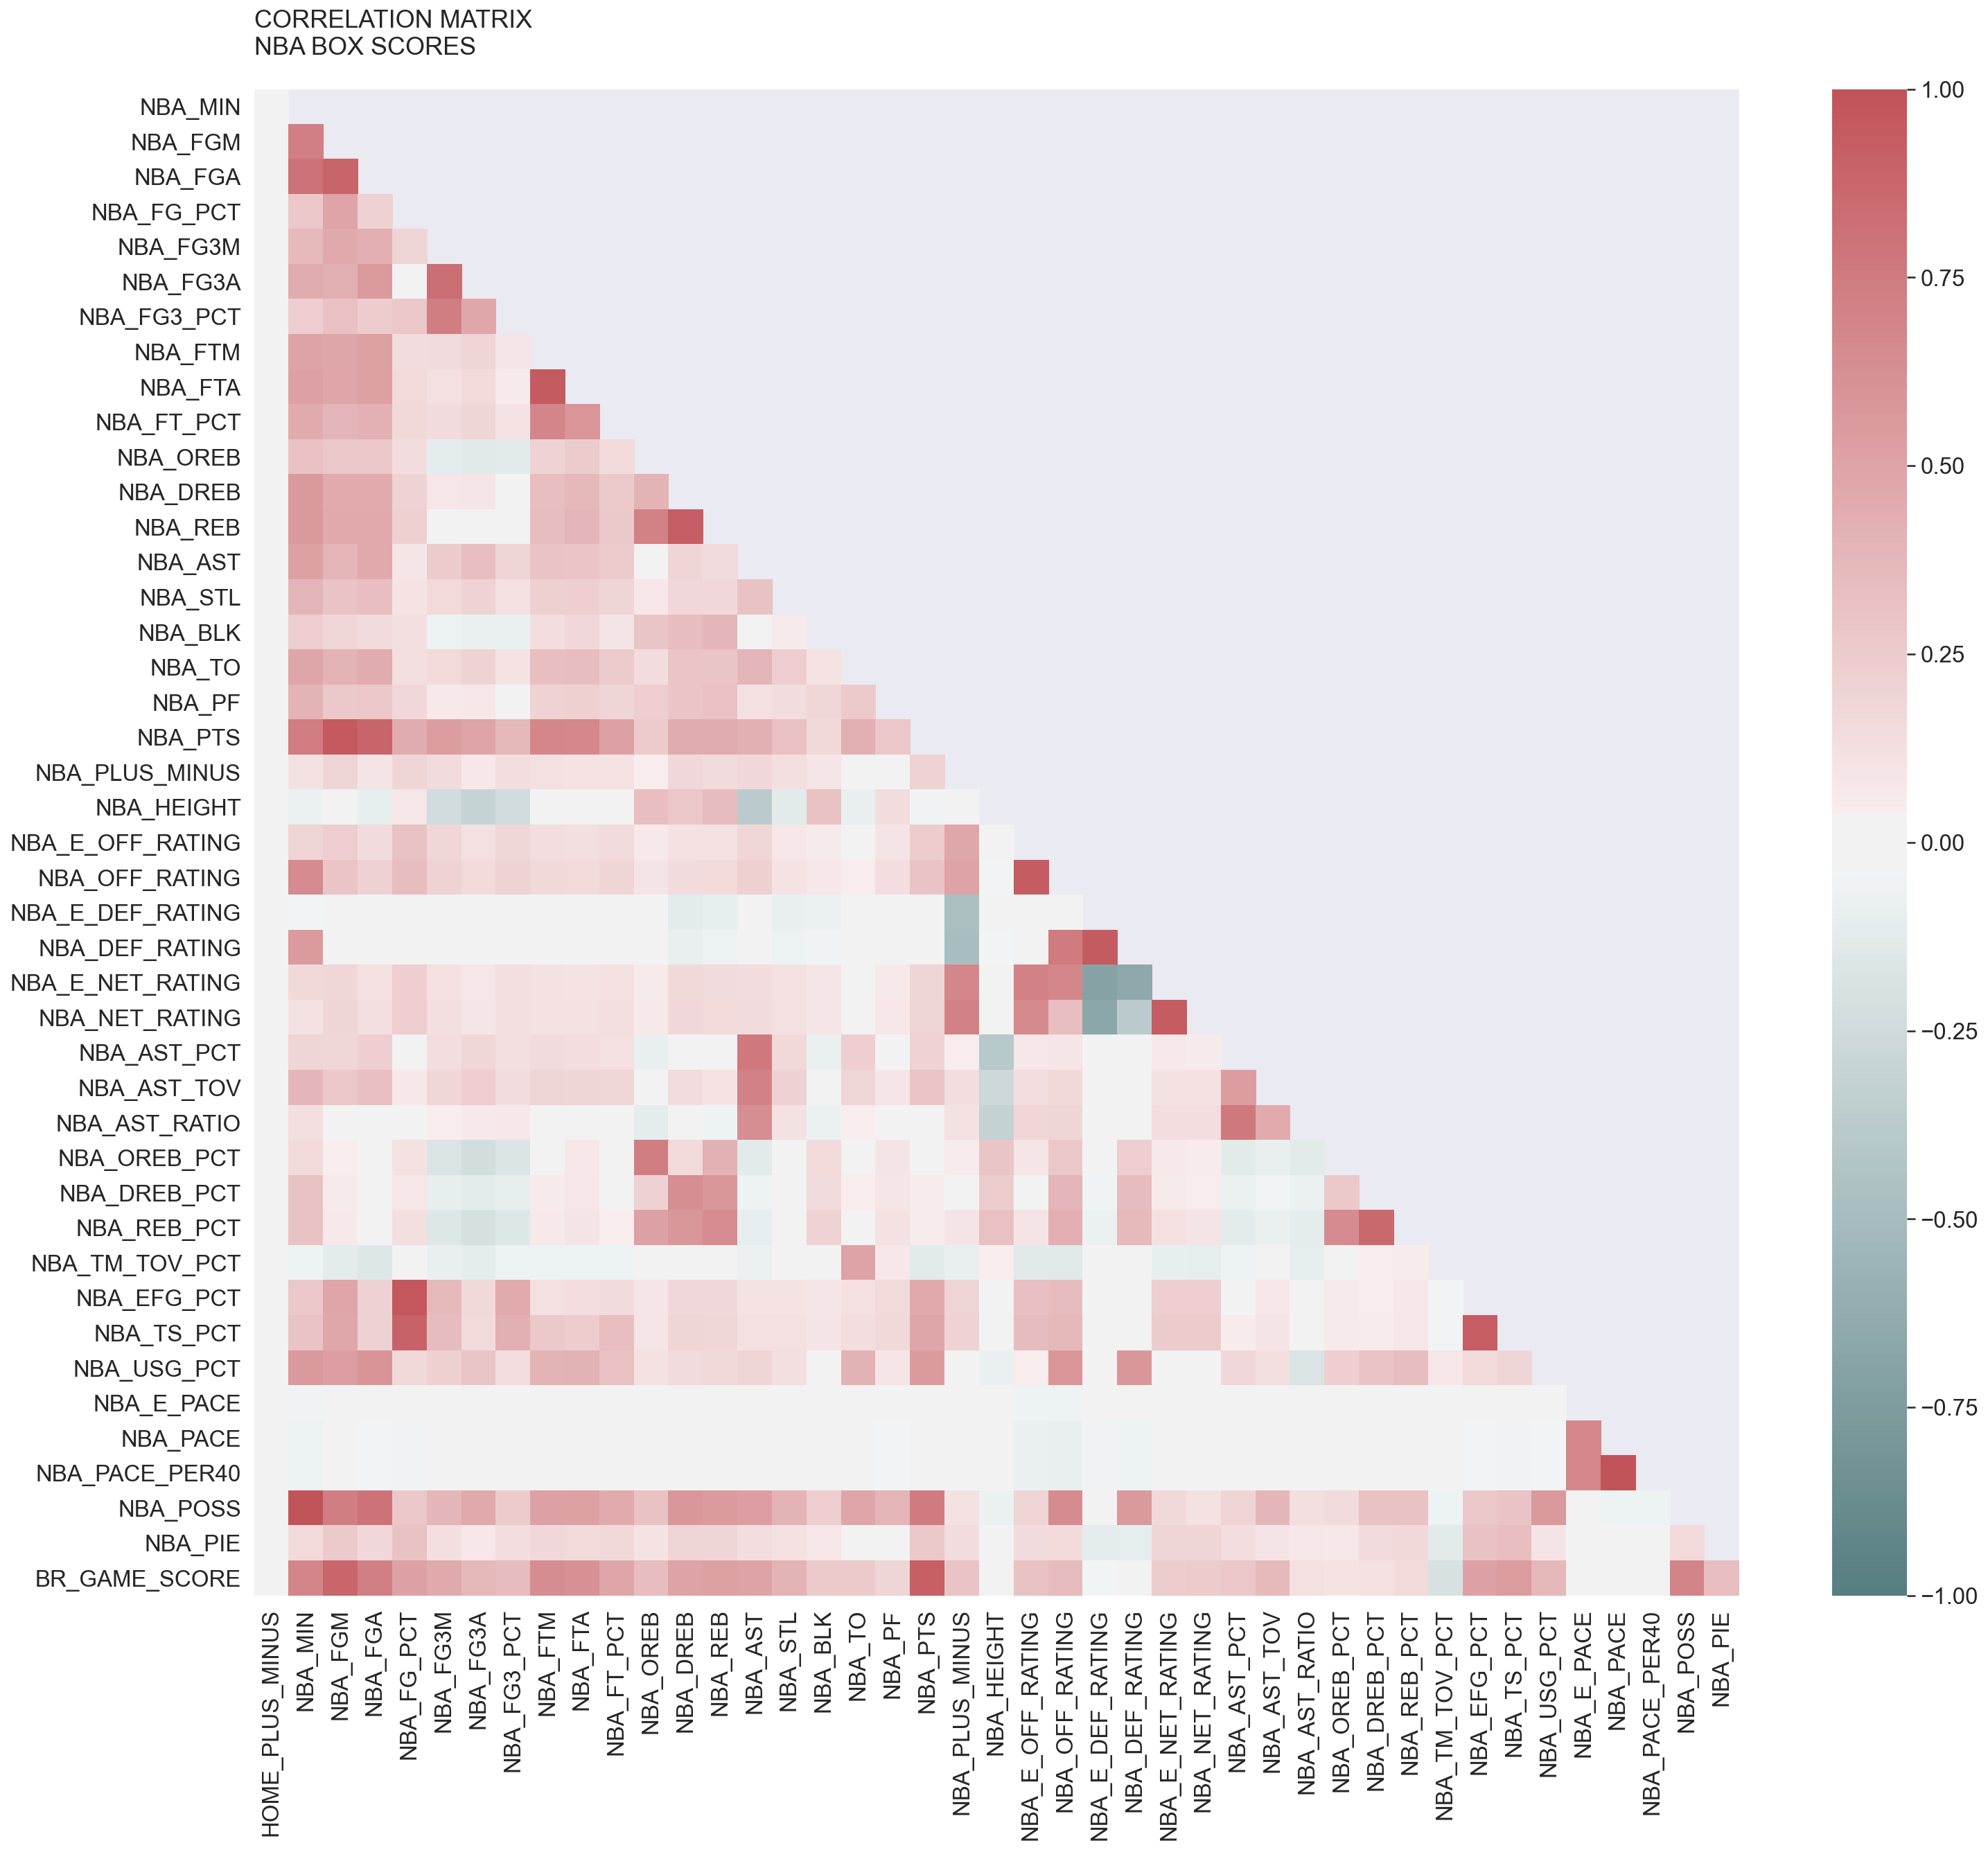

In [31]:
df_corr = data.corr()
fig, ax = plt.subplots(figsize=(24, 20))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(200, 10, 50, n=9, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nNBA BOX SCORES\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

In [32]:
players = data.groupby('nba_player_id')

In [37]:
players.get_group(data['nba_player_id'].unique()[200])['nba_start_position'].unique()

array(['G', None, 'F'], dtype=object)

In [38]:
test = players.get_group(data['nba_player_id'].unique()[200])

In [40]:
test[test['nba_start_position'].isna()==False]

,nba_game_date,nba_season_id,br_location,nba_gm_type,br_outcome,home_plus_minus,nba_game_id,nba_team_id,nba_team_abbreviation,nba_team_city,...,nba_tm_tov_pct,nba_efg_pct,nba_ts_pct,nba_usg_pct,nba_e_pace,nba_pace,nba_pace_per40,nba_poss,nba_pie,br_game_score
200,1999-11-02,21999,AWAY,Regular,L,14,29900005,1610612753,ORL,Orlando,...,22.2,0.286,0.286,0.196,103.08,103.03,85.86,42.0,-0.020,-0.5
334,1999-11-03,21999,HOME,Regular,W,9,29900015,1610612753,ORL,Orlando,...,21.4,0.278,0.311,0.309,111.83,110.51,92.09,64.0,0.026,2.6
660,1999-11-05,21999,HOME,Regular,L,-5,29900029,1610612753,ORL,Orlando,...,10.0,0.531,0.563,0.227,105.69,103.59,86.32,72.0,0.142,13.2
1027,1999-11-06,21999,AWAY,Regular,W,-3,29900036,1610612753,ORL,Orlando,...,7.1,0.625,0.658,0.150,104.21,106.50,88.75,72.0,0.106,13.4
1250,1999-11-08,21999,AWAY,Regular,W,-5,29900052,1610612753,ORL,Orlando,...,0.0,0.333,0.388,0.151,111.99,109.61,91.34,69.0,0.124,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62690,2001-11-13,22001,HOME,Regular,W,8,20100106,1610612743,DEN,Denver,...,9.1,0.600,0.600,0.289,93.79,91.74,76.45,33.0,0.114,7.2
62971,2001-11-15,22001,HOME,Regular,L,-19,20100120,1610612743,DEN,Denver,...,8.3,0.111,0.145,0.275,93.86,91.50,76.25,33.0,-0.190,-2.8
63376,2001-11-17,22001,AWAY,Regular,W,-10,20100140,1610612743,DEN,Denver,...,16.7,0.500,0.563,0.055,90.47,90.11,75.09,75.0,0.060,6.3
63600,2001-11-19,22001,HOME,Regular,W,3,20100144,1610612743,DEN,Denver,...,5.9,0.455,0.470,0.161,87.80,87.38,72.82,72.0,0.066,11.5


In [42]:
def position_creator(unique_start_positions):
    if len(unique_start_positions)<3:
        if 'G' in unique_start_positions:
            return 'G'
        elif 'C' in unique_start_positions:
            return 'C'
        elif 'F' in unique_start_positions:
            return 'F'
    elif len(unique_start_positions)==3:
        if 'F' in unique_start_positions:
            if 'G' in unique_start_positions:
                return 'G/F'
            elif 'C' in unique_start_positions:
                return 'F/C'

position_creator(test['nba_start_position'].unique())

'G/F'

In [43]:
test['nba_start_position'].unique()

array(['G', None, 'F'], dtype=object)